## <b>In this project, the dataset contains information about used cars listed on www.cardekho.com. This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.</b>

## <b>The columns in the given dataset are as follows:</b>

- ### name
- ### year
- ### selling_price
- ### km_driven
- ### fuel
- ### seller_type
- ### transmission
- ### Owner

## <b>Load up this dataset in the kernel and perform initial exploratory data analysis (EDA). You should also try creating new features based on the existing ones. The dependent variable is the <code>selling_price</code>. 


In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')

In [204]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [205]:
dataset = pd.read_csv('/content/drive/MyDrive/Alma Notes/Machine Learning/Supervised Learning/Linear Regression/Projects/Self Project/Car details v3.csv')

In [206]:
dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [207]:
dataset.drop_duplicates(inplace = True)

In [208]:
dataset.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          208
engine           208
max_power        205
torque           209
seats            208
dtype: int64

In [209]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6926 entries, 0 to 8125
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6926 non-null   object 
 1   year           6926 non-null   int64  
 2   selling_price  6926 non-null   int64  
 3   km_driven      6926 non-null   int64  
 4   fuel           6926 non-null   object 
 5   seller_type    6926 non-null   object 
 6   transmission   6926 non-null   object 
 7   owner          6926 non-null   object 
 8   mileage        6718 non-null   object 
 9   engine         6718 non-null   object 
 10  max_power      6721 non-null   object 
 11  torque         6717 non-null   object 
 12  seats          6718 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 757.5+ KB


In [210]:
dataset['mileage'] = dataset['mileage'].apply(lambda x: float(str(x).split(' ')[0]))
dataset['engine'] = dataset['engine'].apply(lambda x: float(str(x).split(' ')[0]))

In [211]:
def fn(x):
  a = 0
  if x:
    a = float(x)
  else:
    a = float('NaN')
  return a

In [212]:
dataset['max_power'] = dataset['max_power'].apply(lambda x : re.split("\s+", str(x))[0])

In [213]:
dataset['max_power'] = dataset['max_power'].apply(lambda x: fn(x))

In [214]:
dataset.drop(['torque'], axis=1,inplace=True)

In [215]:
dataset['mileage'] = dataset['mileage'].fillna(np.mean(dataset['mileage']))
dataset['engine'] = dataset['engine'].fillna(np.mean(dataset['engine']))
dataset['max_power'] = dataset['max_power'].fillna(np.mean(dataset['max_power']))

In [216]:
dataset.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,6926.000000,6.926000e+03,6.926000e+03,6926.000000,6926.000000,6926.000000,6718.000000
mean,2013.420300,5.172707e+05,7.399568e+04,19.465310,1430.891337,87.726919,5.434653
std,4.078286,5.197670e+05,5.835810e+04,3.987876,486.025467,31.295492,0.984230
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,0.000000,2.000000
25%,2011.000000,2.500000e+05,4.000000e+04,16.950000,1197.000000,68.000000,5.000000
50%,2014.000000,4.000000e+05,7.000000e+04,19.465310,1248.000000,81.860000,5.000000
75%,2017.000000,6.335000e+05,1.000000e+05,22.320000,1498.000000,99.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000


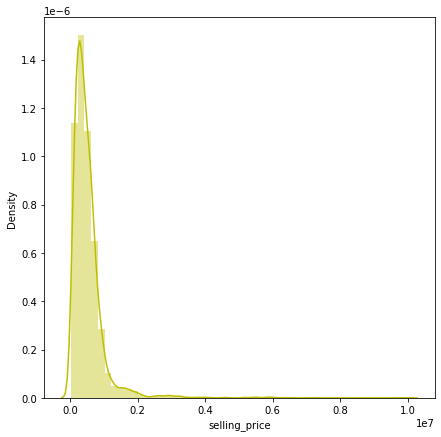

In [217]:
#Salling_price Distribution
plt.figure(figsize=(7,7))
sns.distplot(dataset['selling_price'], color='y')

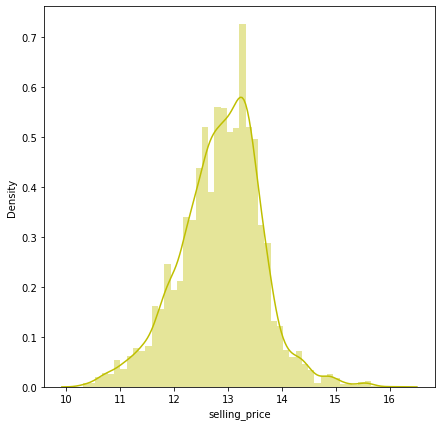

In [218]:
#log transmition
plt.figure(figsize=(7,7))
sns.distplot(np.log(dataset['selling_price']), color='y')

# Numerical EDA

In [219]:
numerical_feature = dataset[['selling_price', 'km_driven', 'mileage', 'engine', 'max_power']].columns

### Univarient EDA

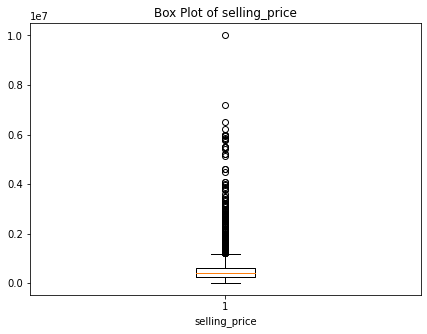

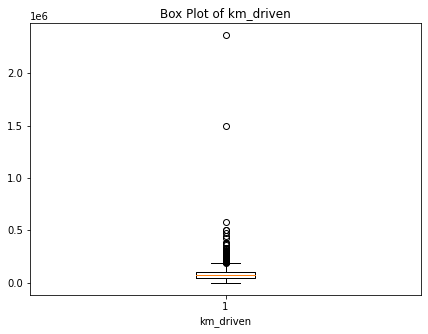

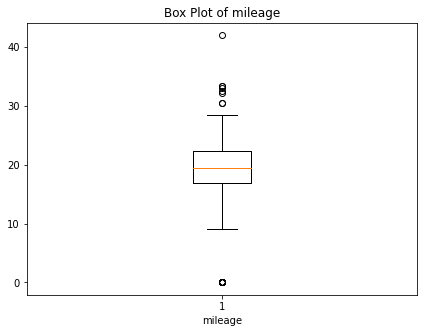

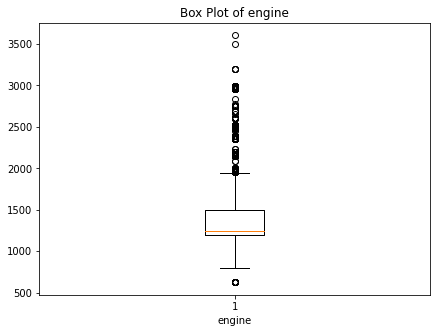

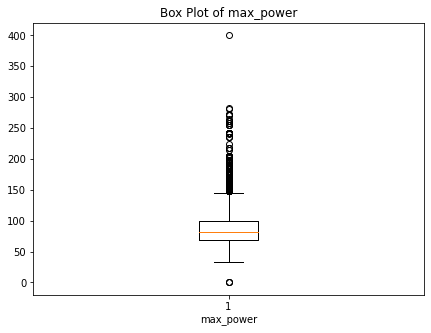

In [238]:
for col in numerical_feature:
  plt.figure(figsize=(7,5))
  plt.boxplot(dataset[col])
  plt.xlabel(col)
  plt.title(f'Box Plot of {col}')
  plt.show()

### Bivarient EDA

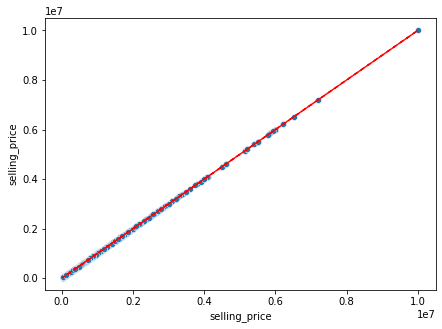

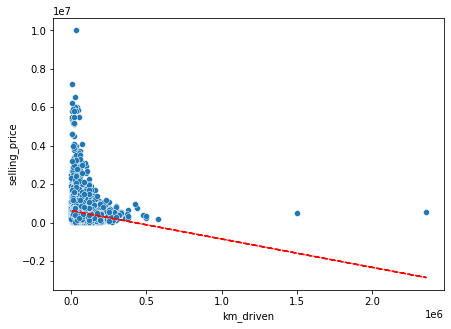

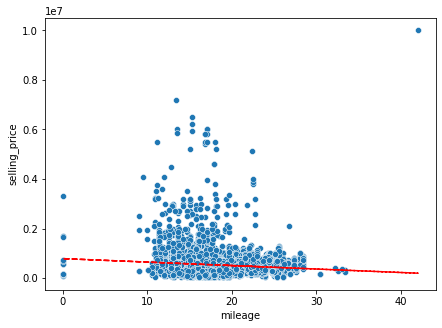

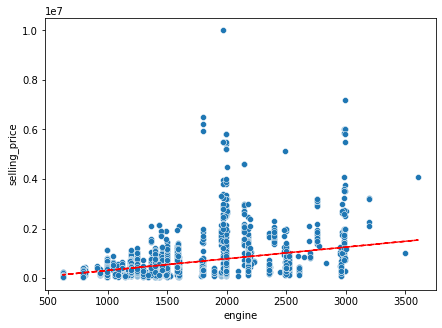

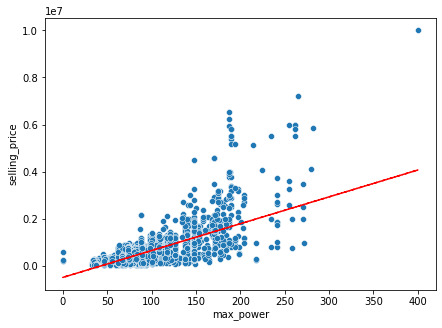

In [225]:
for col in numerical_feature:
  plt.figure(figsize = (7,5))
  sns.scatterplot(x=col, y='selling_price', data=dataset)
  coeff = np.polyfit(dataset[col], dataset['selling_price'], deg=1)
  
  z = np.polyfit(dataset[col], dataset['selling_price'], 1)
  y_hat = np.poly1d(z)(dataset[col])
 
  plt.plot(dataset[col], y_hat,"r--")
  plt.show()


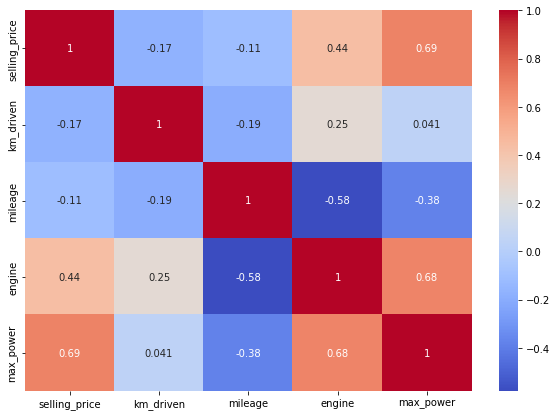

In [234]:
corr = dataset[numerical_feature].corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, cmap='coolwarm')


In [235]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [237]:
calc_vif(dataset[[i for i in numerical_feature if i not in ['selling_price']]])

,variables,VIF
0,km_driven,2.833213
1,mileage,5.554393
2,engine,18.037242
3,max_power,16.901308


In [239]:
calc_vif(dataset[[i for i in numerical_feature if i not in ['selling_price', 'engine']]])

,variables,VIF
0,km_driven,2.425255
1,mileage,5.475932
2,max_power,5.534091
